In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('C:\Final_project\Final_project\data\winequality-red.csv')

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

"Fixed acidity" (sabit asidite) is one of the characteristics of wine, representing the amount of non-volatile acids in the wine.

"Volatile acidity" (uçucu asidite) indicates the amount of volatile acid in the wine, typically referred to as acetic acid.

"Citric acid" (sitrik asit) presence adds freshness and liveliness to the taste of the wine. Citric acid can also prevent oxidation in the wine and enhance its stability. (It can be inferred that it is proportional to the quality.)

"Residual sugar" affects the taste profile of the wine significantly. Higher residual sugar values generally impart a sweet character to the wine. It should be at least 1 gram.

"Chlorides" (klorürler) represent the amount of chloride in the wine, indicating the presence of salt components, especially chloride ions. Wines with low chloride content often have a cleaner and fresher taste profile. However, excessive increase in chloride levels can leave a salty sensation in the wine, which may be undesirable. (It can be observed that it is inversely proportional to the quality.)

"Free sulfur dioxide" is added to wine to prevent oxidation, control the growth of microorganisms, and ensure the preservation of the wine.

"Total sulfur dioxide" is the amount of both free and bound forms of SO2; at low concentrations, SO2 is often not detectable in wine but is found in free SO2.

Density is typically used in determining the alcohol and sugar content of the wine. As the alcohol content increases, density generally tends to rise.

"pH," generally, wines typically have a pH value ranging from 3 to 4.

"Sulphates" is a wine additive that can contribute to sulfur dioxide gas (SO2) levels, acting as an antimicrobial. It indicates the amount of sulfate salts in the wine. Sulfates are commonly added during the wine production process as an additive and can aid in preserving the wine due to their antimicrobial properties.

"Alcohol sulfur dioxide" is the percentage alcohol content of the wine.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

<Axes: >

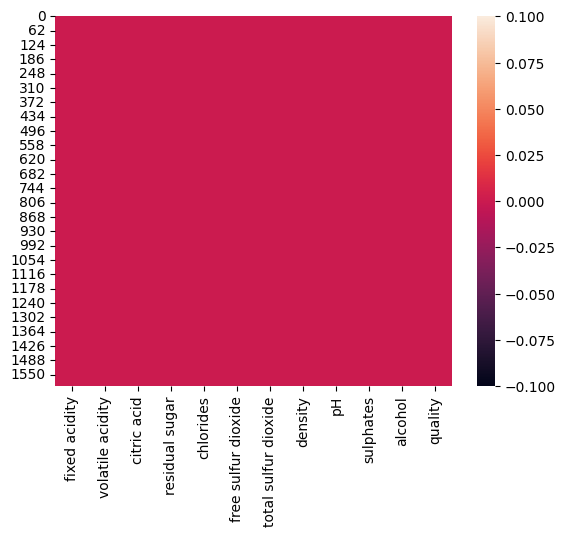

In [10]:
sns.heatmap(df.isnull())

Veri setinde boş değer bulunmamaktadır ve tüm değerlerin numerik olduğunu görüyoruz.
Tüm değerlerimiz numerik olduğundan hepsini describe() metodu ile inceleyebiliriz.

In [11]:
df.describe().T.style.background_gradient(axis=0)

- Şeker değerinin en az 1 olması gerektiğini biliyoruz. Ancak şeker miktarı min 0 olarak alınmış.
- Citric asid
- total sulfür dioxide*

In [12]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

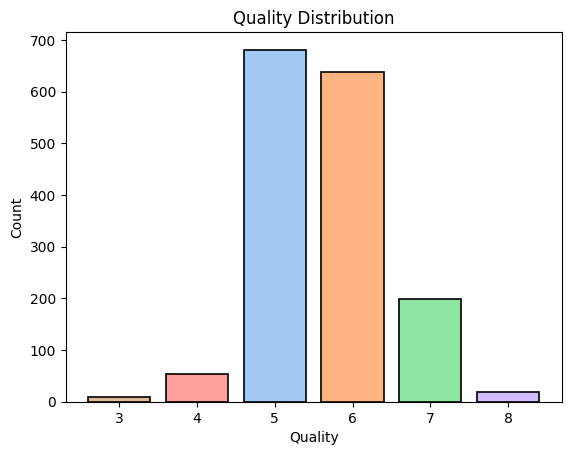

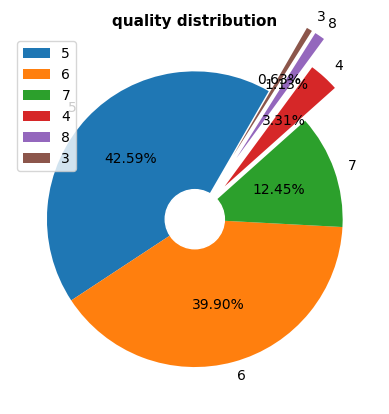

In [13]:
value_counts = df['quality'].value_counts()
pastel_colors = sns.color_palette("pastel")
plt.bar(value_counts.index, value_counts.values, color=pastel_colors, edgecolor='black', linewidth=1.2)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution')
plt.show()
Number = df.quality.value_counts().values
Label = df.quality.value_counts().index
circle = plt.Circle((0,0),0.2,color = "white")
explodeTuple = (0.0, 0.0, 0.0, 0.3, 0.5, 0.5)
plt.pie(Number, labels = Label,autopct='%1.2f%%', explode=explodeTuple,startangle=60)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)
plt.legend()
plt.show()


Bu veri setinde en çok 5 ve 6 kalitede şarap bulunmakta.

mevcut olan featureselar ile quality arasındaki durumları inceleyelim.

In [14]:
df[["fixed acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")

In [15]:
df[["volatile acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")
# uçucu asitlik değeri azaldıkça kalite artar.

In [16]:
df[["citric acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")
# sitrik asitteki artışın kaliteyi olumlu etkilediğini görüyoruz.

In [17]:
df[["residual sugar","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")

In [18]:
df[["chlorides","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")
# Görüldüğü üzere klorür miktarı ile kalite ters orantılıdır.

In [19]:
df[["free sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")

In [20]:
df[["total sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")

In [21]:
df[["density","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")
#Yoğunluğun azalması kaliteyi olumlu etkiler. 

In [22]:
df[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")
#pH ve kalite arasında ters orantı olduğu gözüküyor.

In [23]:
df[["sulphates","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")

In [24]:
df[["alcohol","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Blues")

Kalite puanı arttıkça: volatile acidity (uçucu)asit miktarı, chlorides miktarı, density ve pH miktarlarının azaldığını söyleyebiliriz.

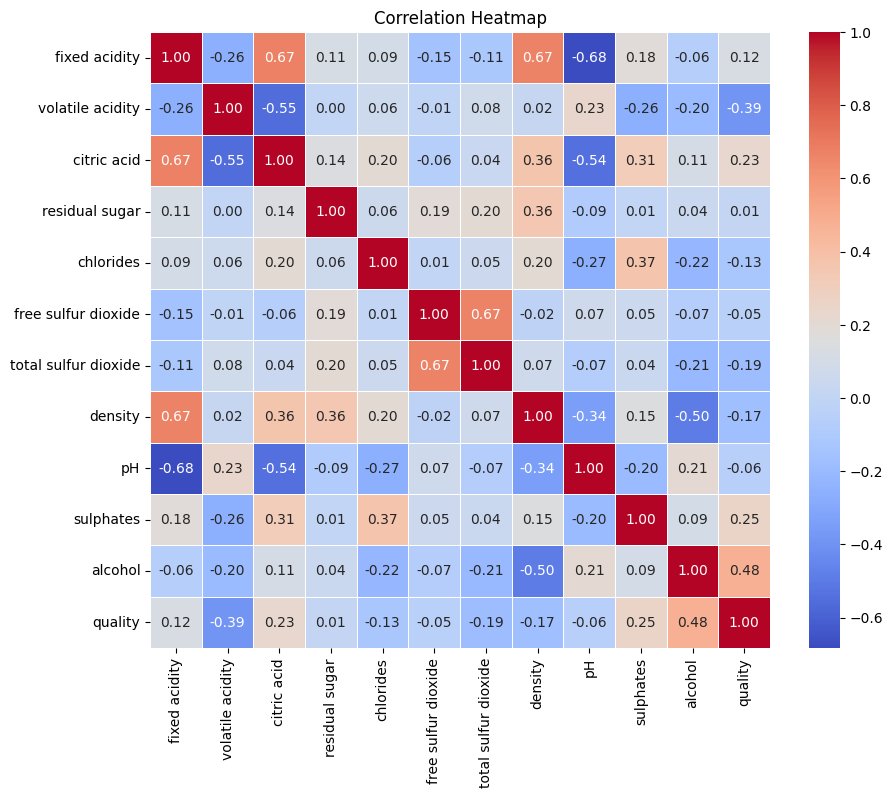

In [25]:
correlation_matrix = df.corr() # Değişkenlerin birbirleriyle olan ilişkisini incelemek için korelasyonu kullanıyoruz. It takes values between -1 and +1.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

We use correlation analysis to examine how variables relate to each other.
fixed acidity (+): citric acid ve density
fixed acidity (-): pH
volatile acidity (-): citric acid
citric acid (+): fixed acidity
citric acid (-): volatile acidity,pH
free sulfur dioxide(+): free sulfur dioxide
density(-): alcohol
density(+): fixed acidity
pH (-): fixed acidity, citric acid
alcohol(+): quality
alcohol(-):density

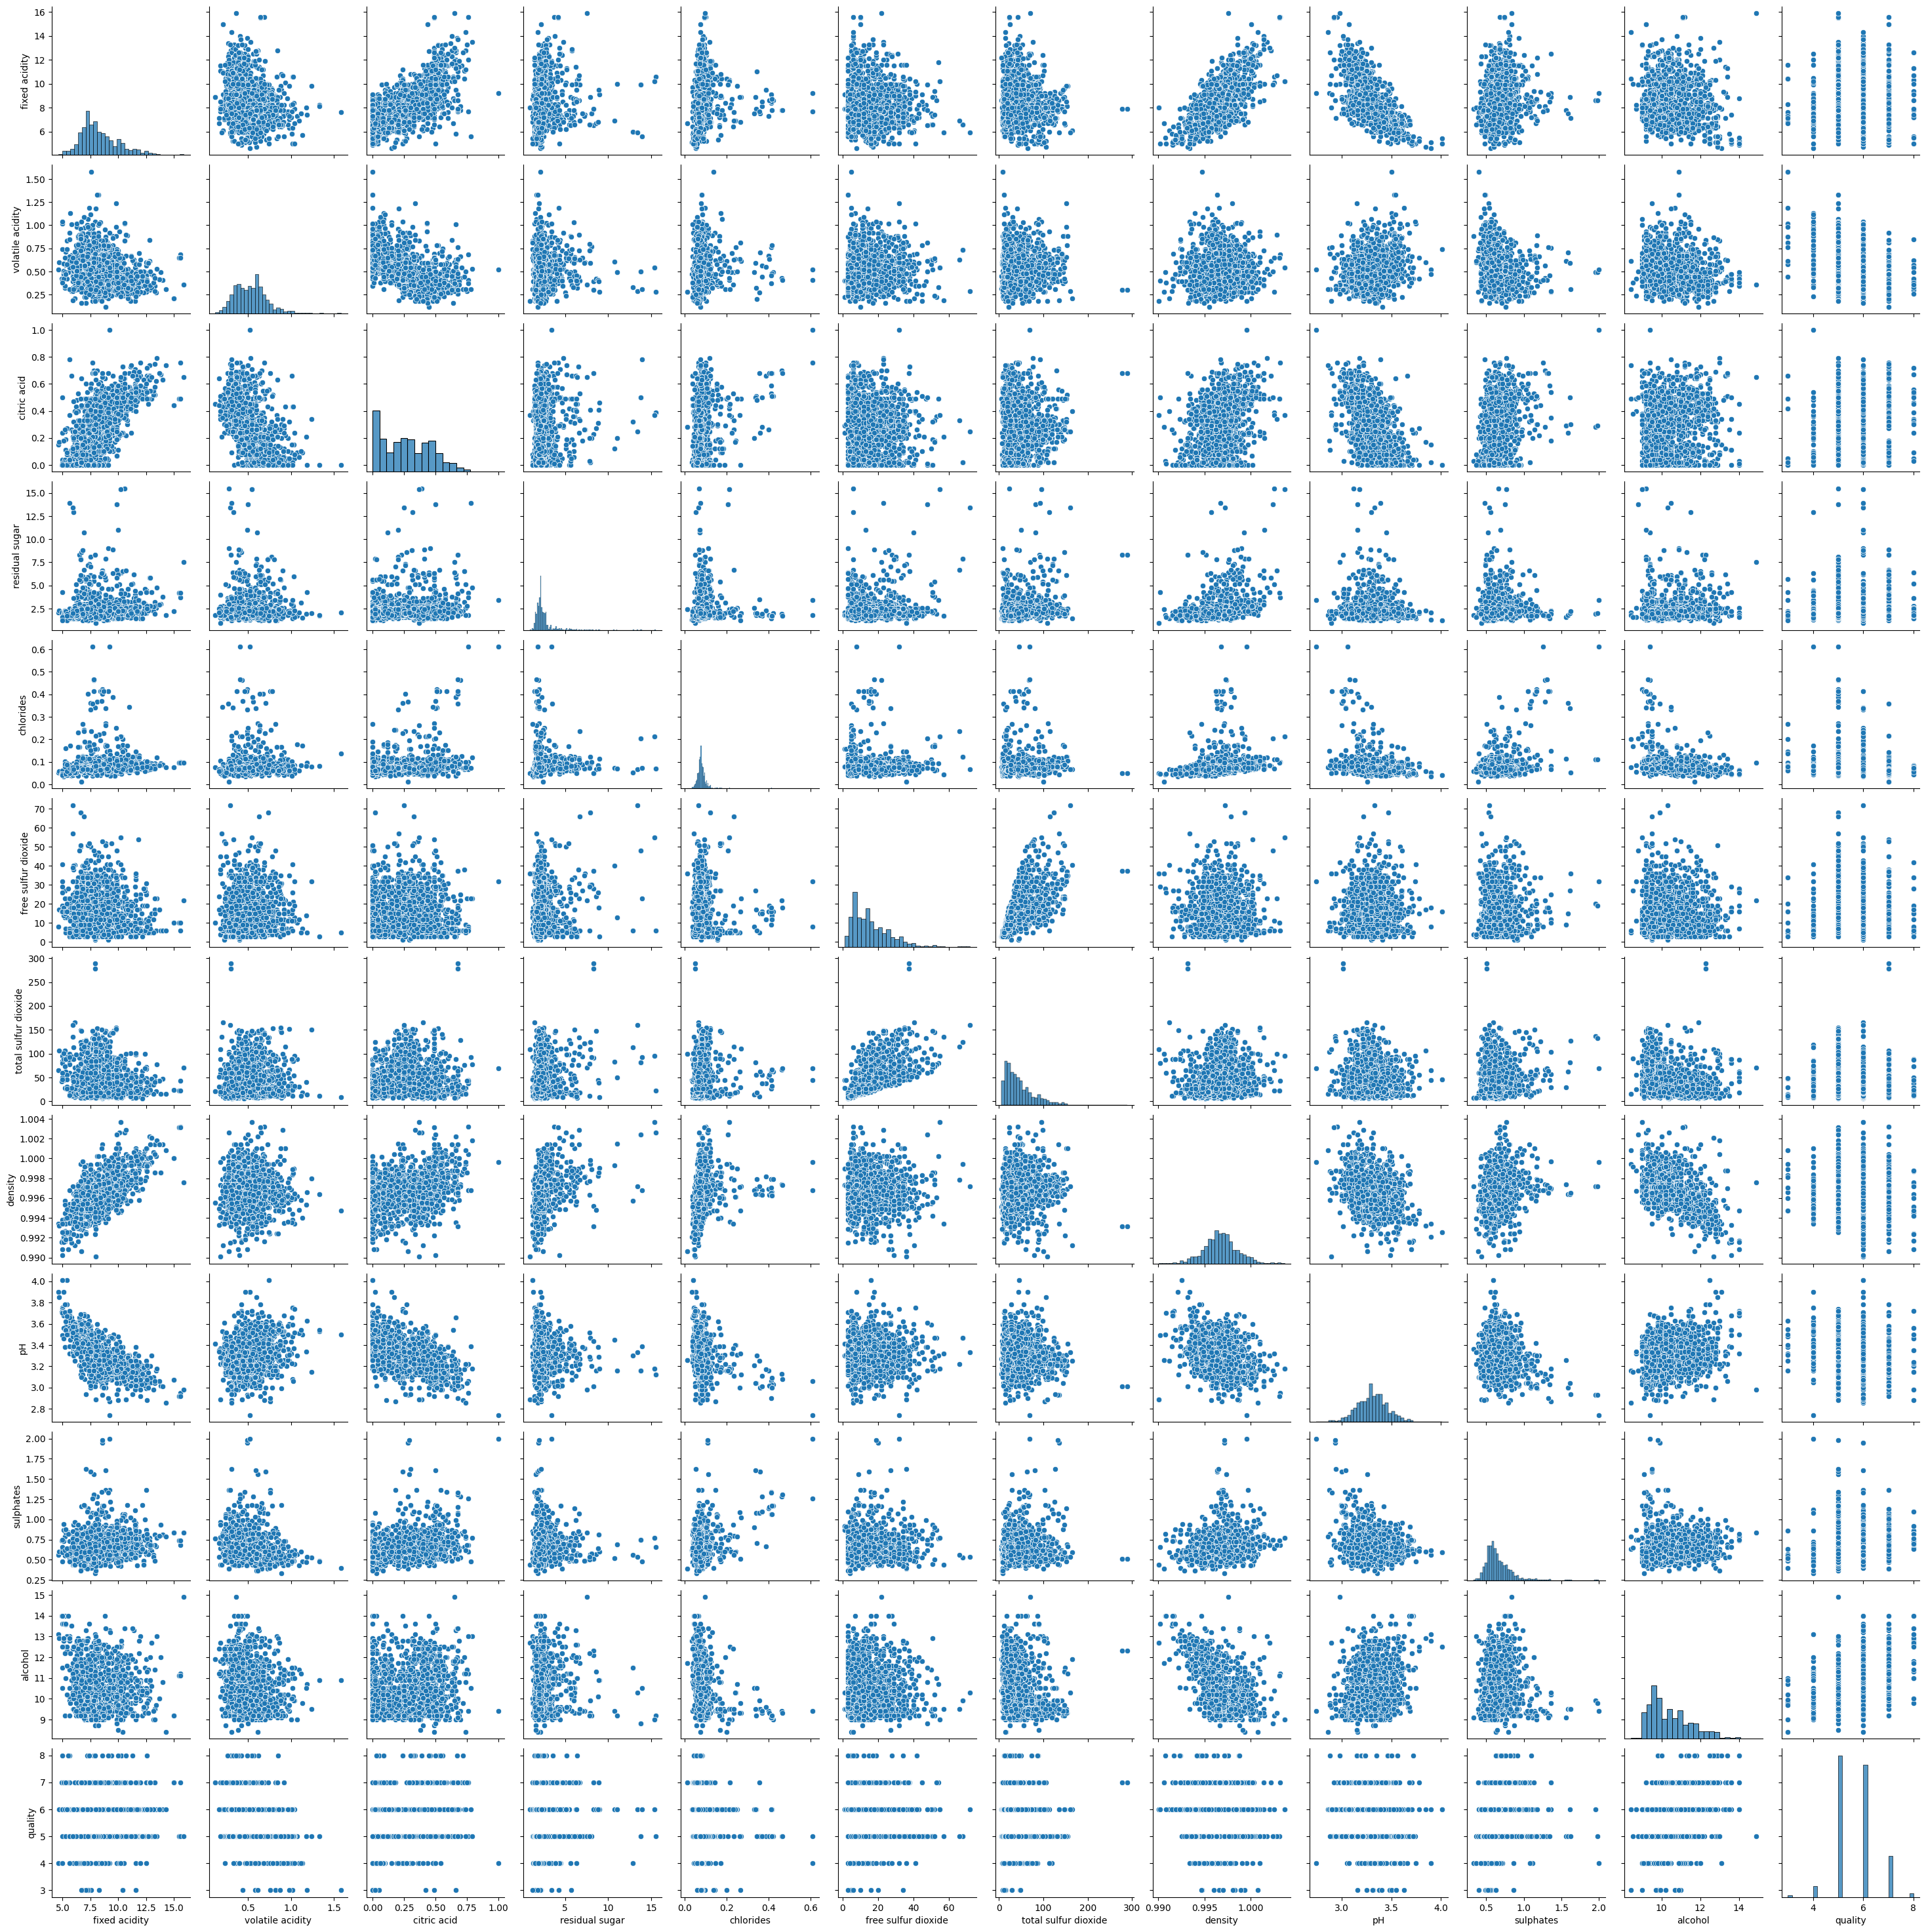

In [26]:
sns.pairplot(df)

When examining the heat map, we observe a high correlation between certain variables:
- fixed acid-citric acid-density
- free sulfur dioxide-total sulfur dioxide
- alcohol-quality

Variables with a negative correlation include:
- pH has a negative correlation with fixed acidity, citric acid, and density.
- The alcohol variable shows a weak positive correlation with pH.

# Görsel olarak regresyon analiziyle inceleyelim.

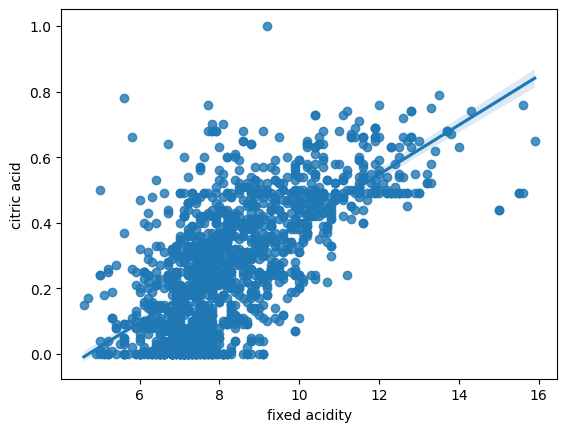

In [27]:
sns.regplot(x='fixed acidity', y='citric acid', data=df)
plt.show()

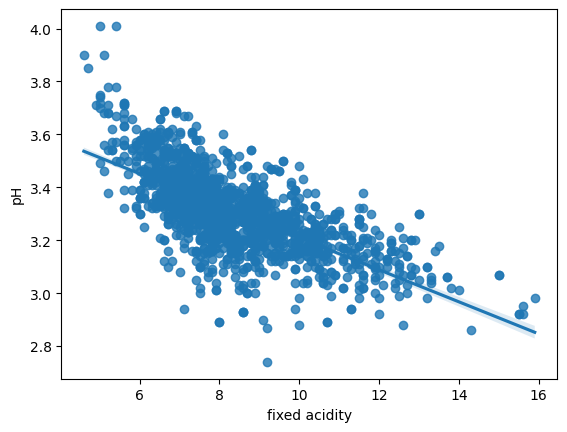

In [40]:
sns.regplot(x='fixed acidity', y='pH', data=df)
plt.show()

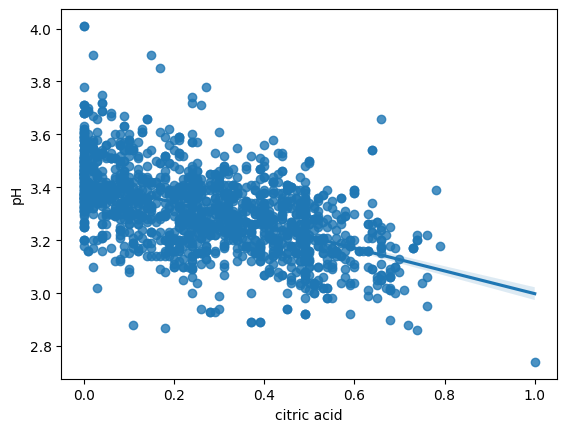

In [41]:
sns.regplot(x='citric acid', y='pH', data=df)
plt.show()

<Axes: xlabel='alcohol', ylabel='quality'>

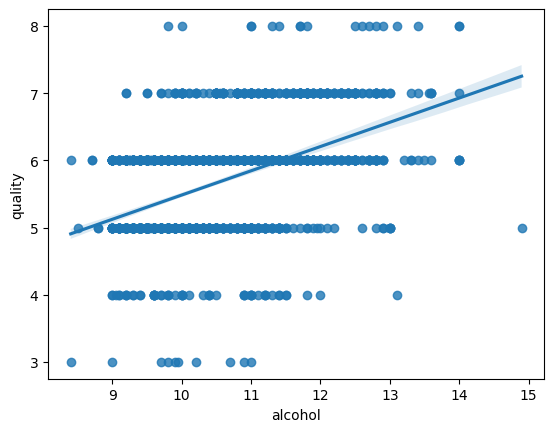

In [28]:
sns.regplot(x='alcohol', y='quality', data=df)


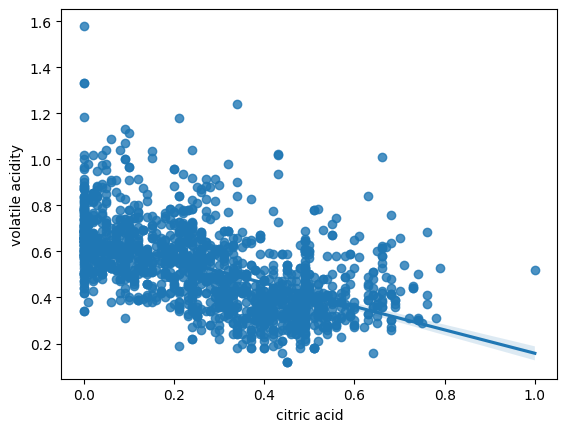

In [29]:
sns.regplot(x='citric acid', y='volatile acidity', data=df)
plt.show()

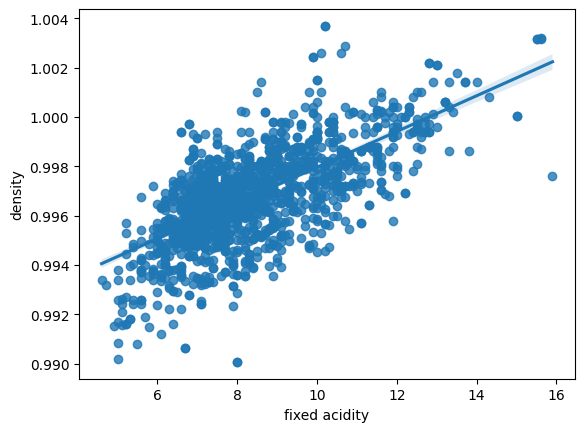

In [30]:
sns.regplot(x='fixed acidity', y='density', data=df)
plt.show()

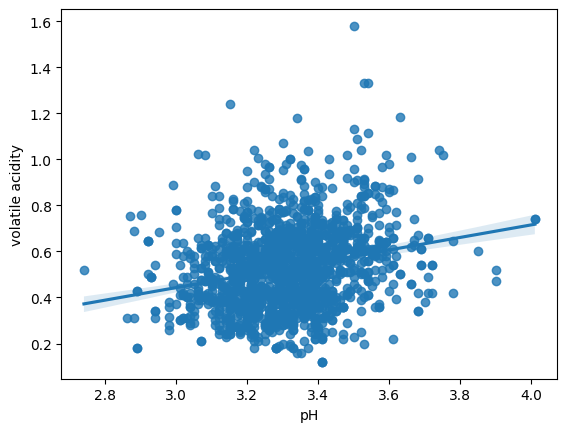

In [31]:
sns.regplot(x='pH', y='volatile acidity', data=df)
plt.show()

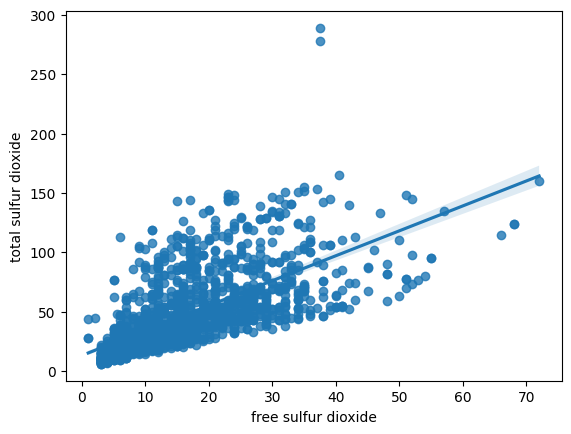

In [32]:
sns.regplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df)
plt.show()

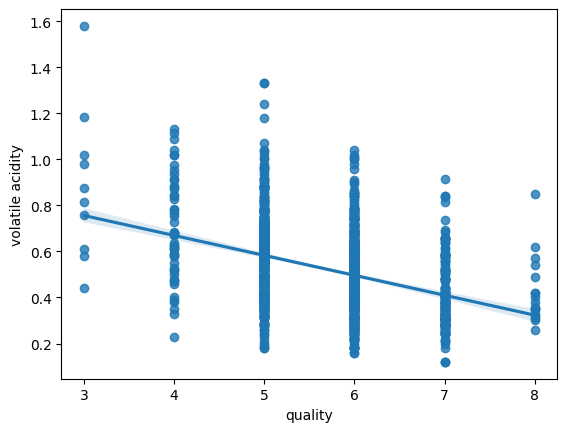

In [33]:
sns.regplot(x='quality', y='volatile acidity', data=df)# zayıf negatif korelasyon
plt.show()

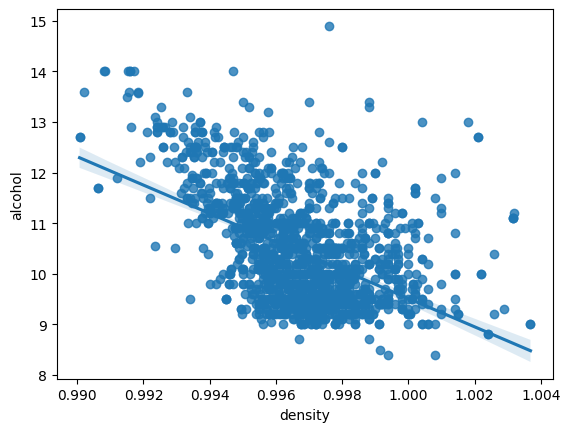

In [34]:
sns.regplot(x='density', y='alcohol', data=df)# zayıf negatif korelasyon
plt.show()

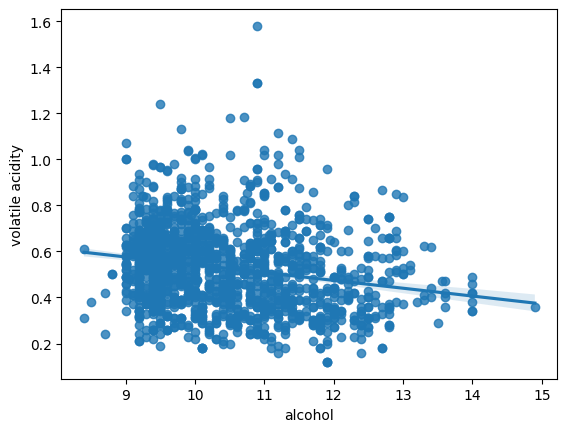

In [35]:
sns.regplot(x='alcohol', y='volatile acidity', data=df)# zayıf negatif korelasyon
plt.show()

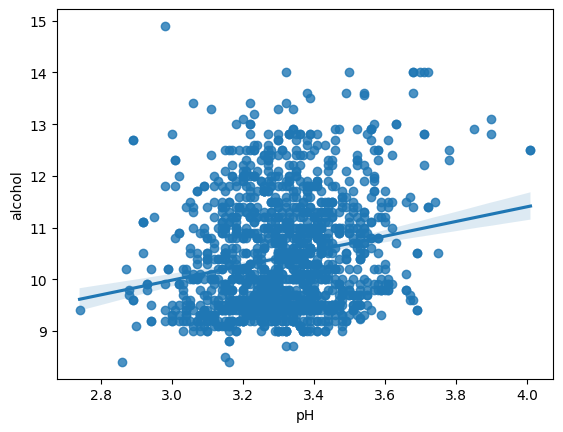

In [36]:
sns.regplot(x='pH', y='alcohol', data=df)# zayıf pozitif korelasyon
plt.show()

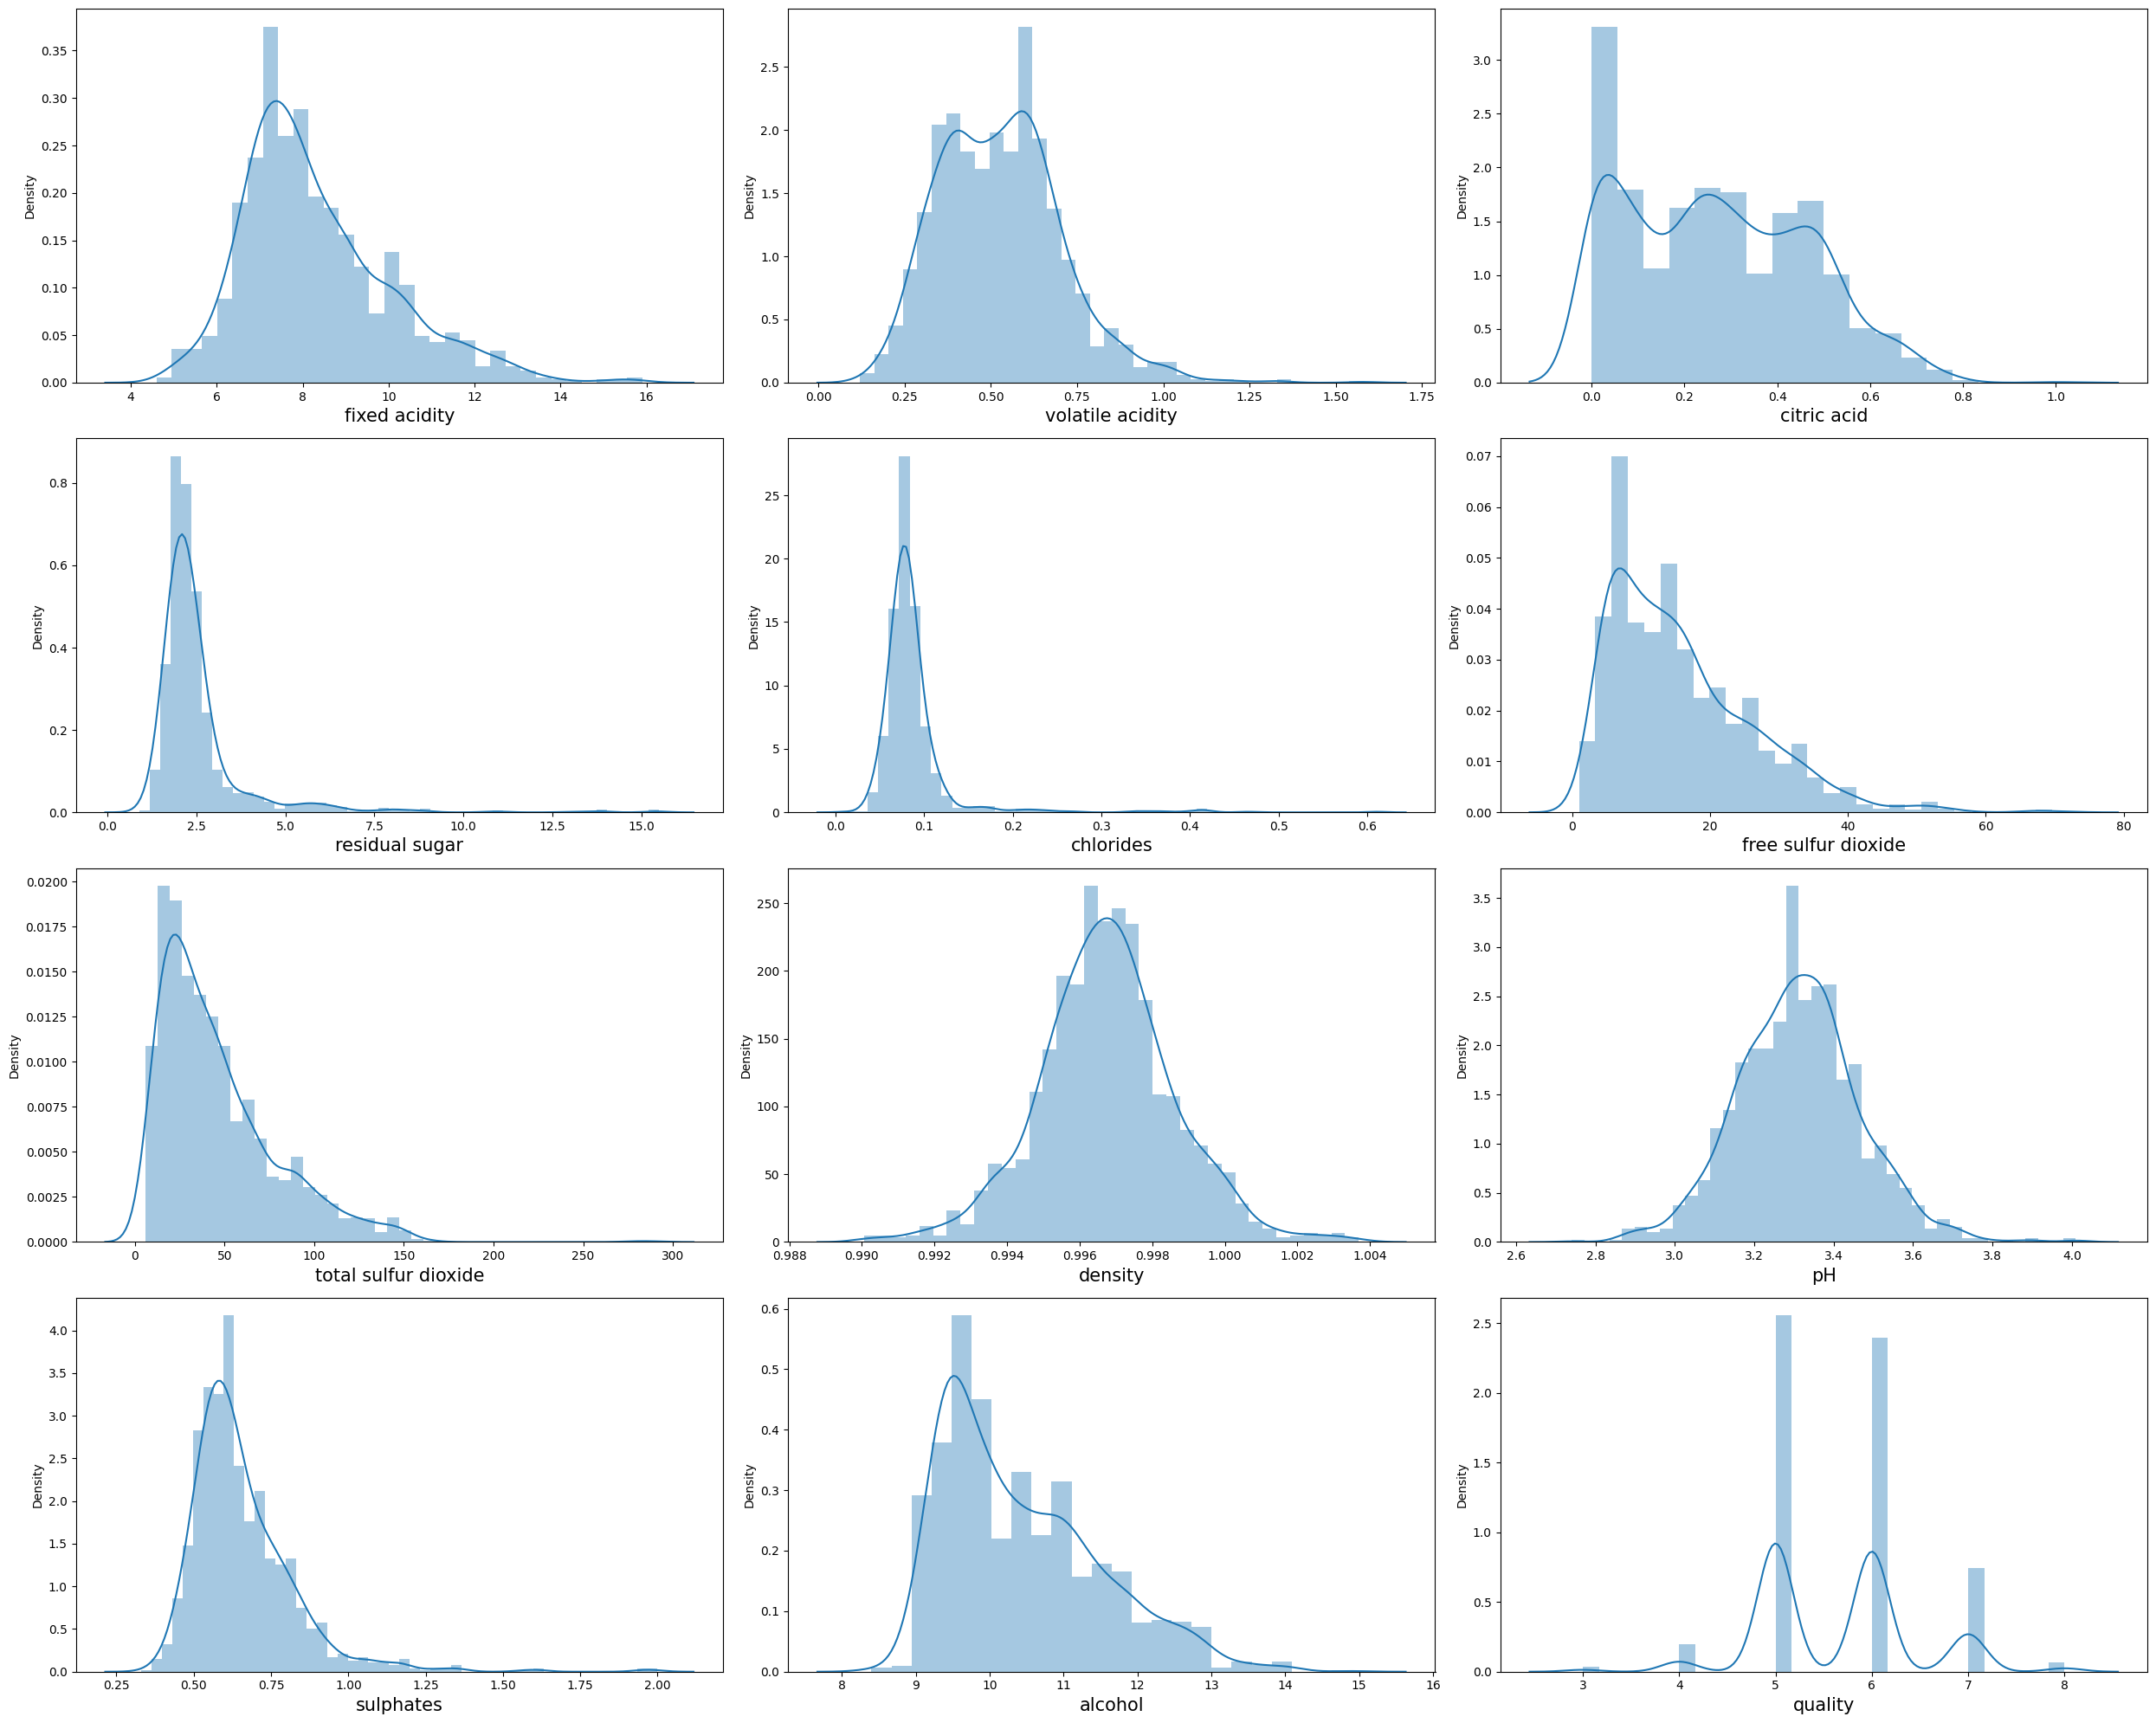

In [37]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Let's examine whether the variables follow a normal distribution.
- Peak values for volatile acidity and citric acid do not conform to a normal distribution.
- The quality variable does not exhibit a normal distribution.
- Density and pH variables seem to follow a normal distribution.
Fixed acidity, alcohol, free sulfur dioxide, and total sulfur dioxide display a slight right skew. (In outlier analysis, log transformation is often used to transform right-skewed distributions. Investigate.)
This suggests the presence of a few values significantly larger than the averages of these variables.

- Chlorides, sulphates, and residual sugar appear to have outlier values.

In [38]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


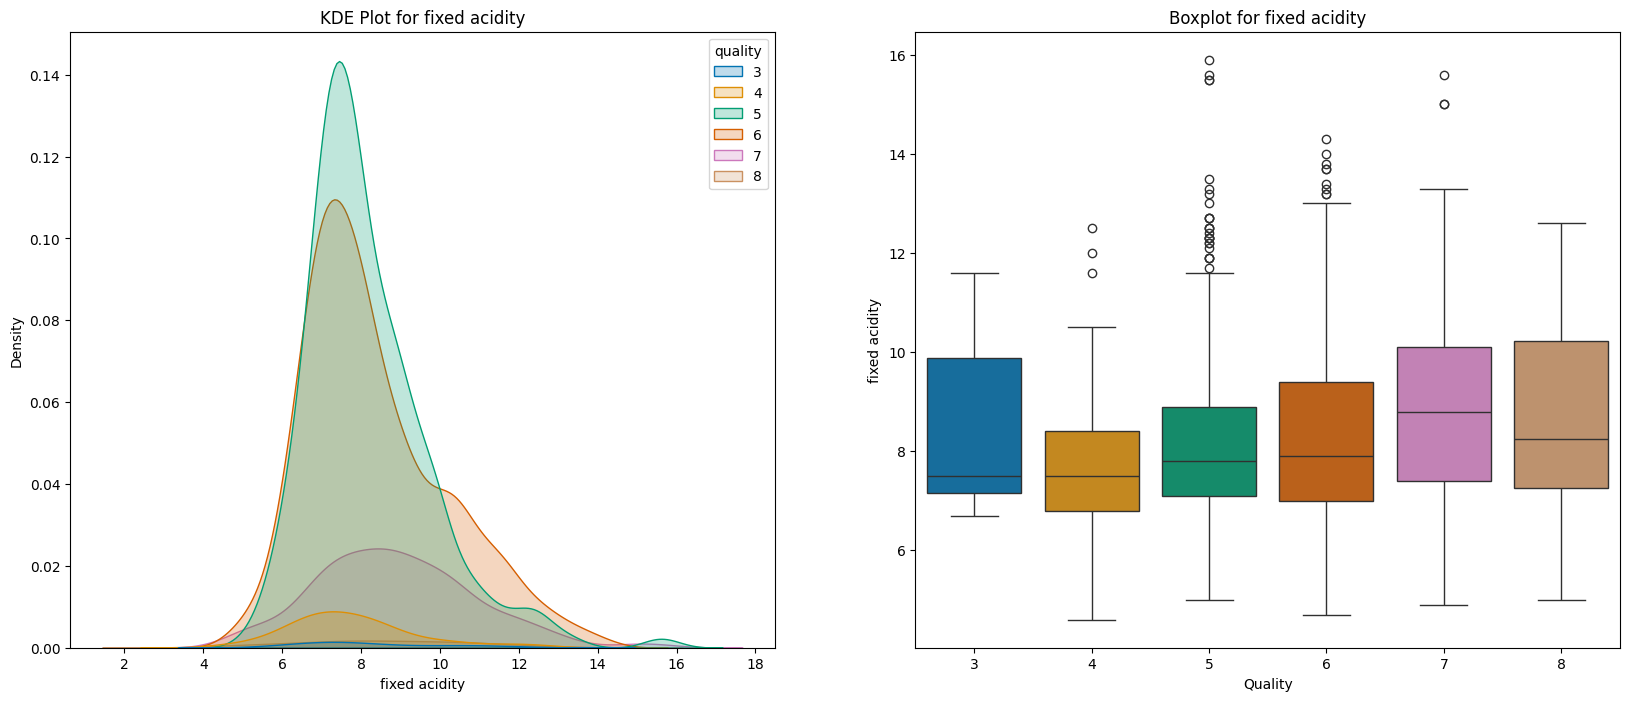

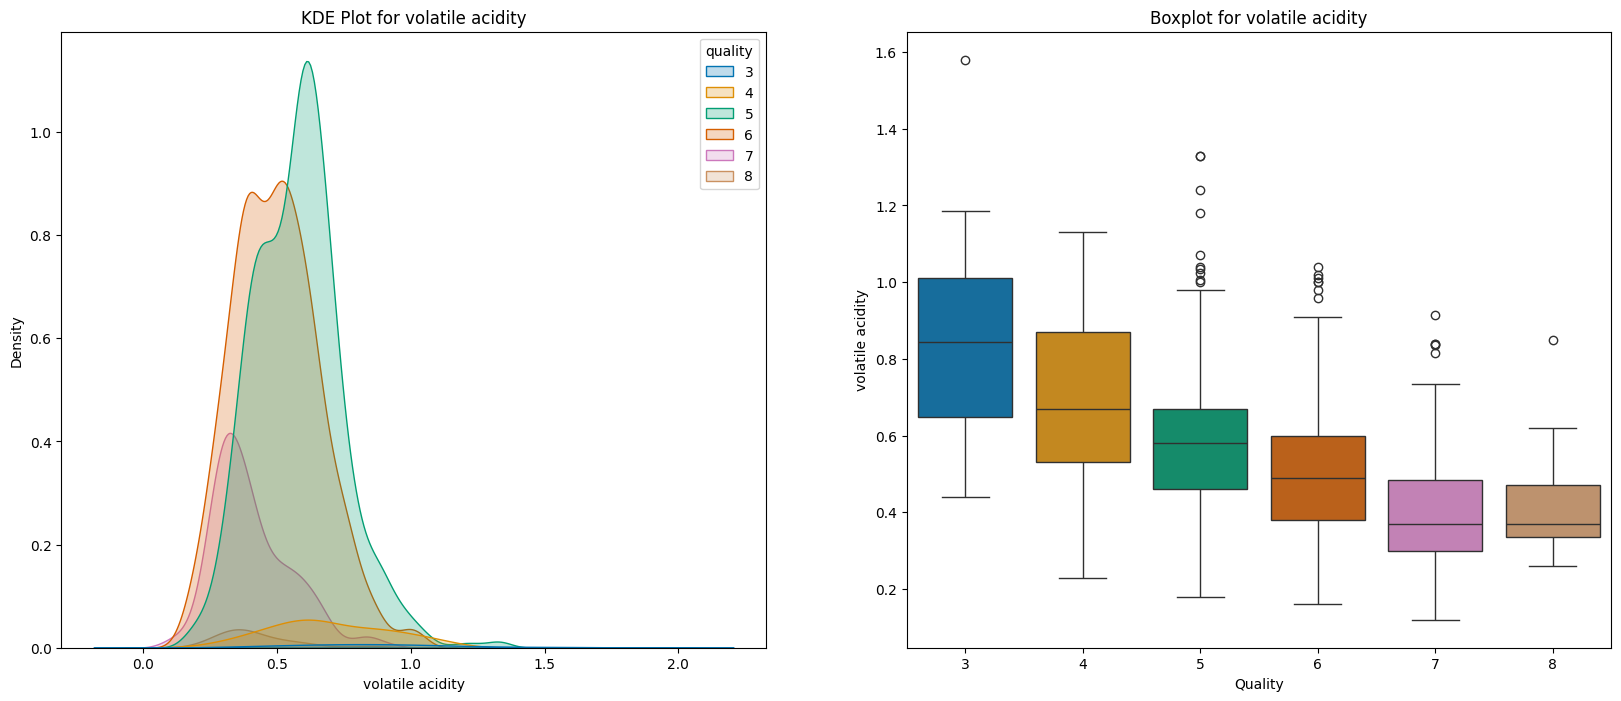

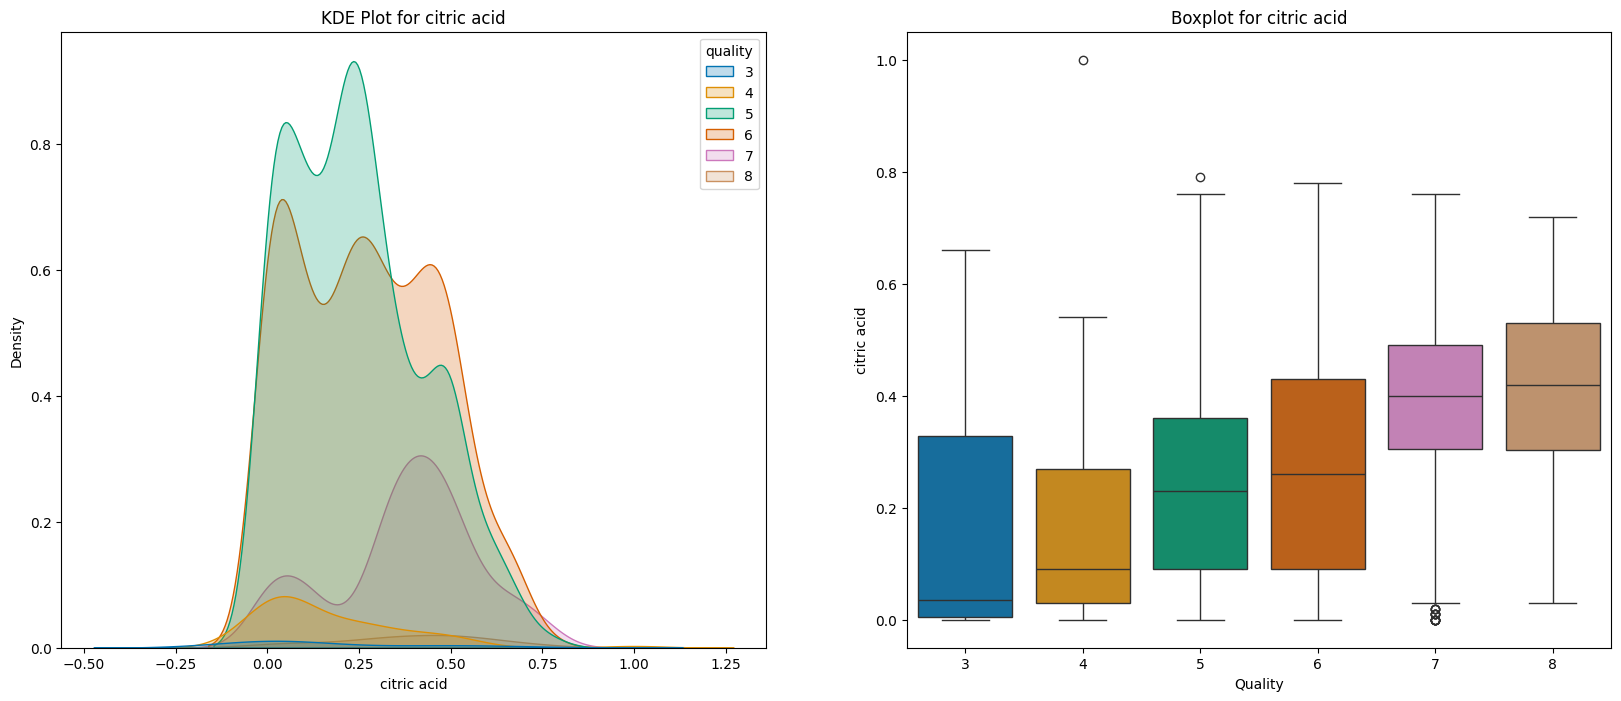

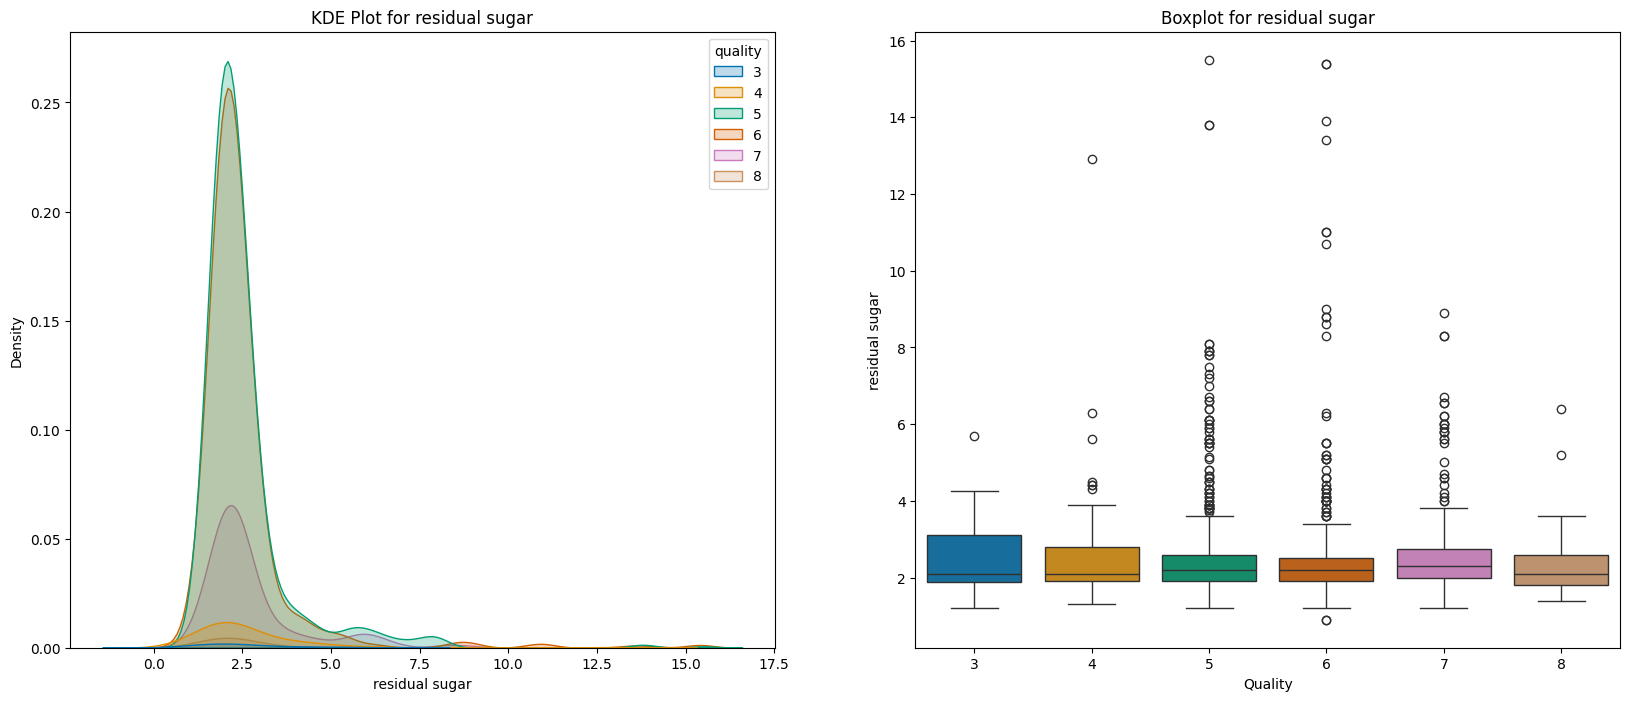

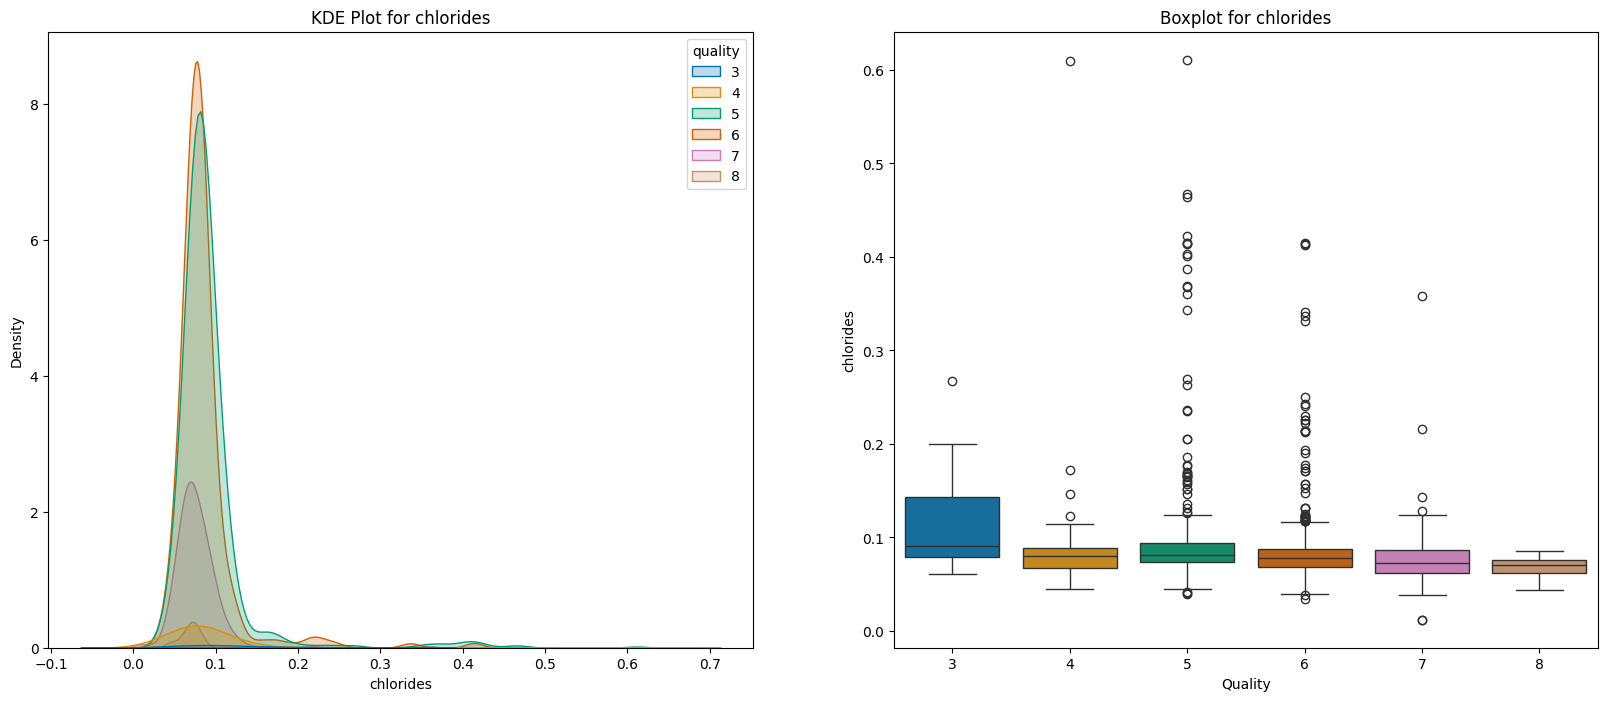

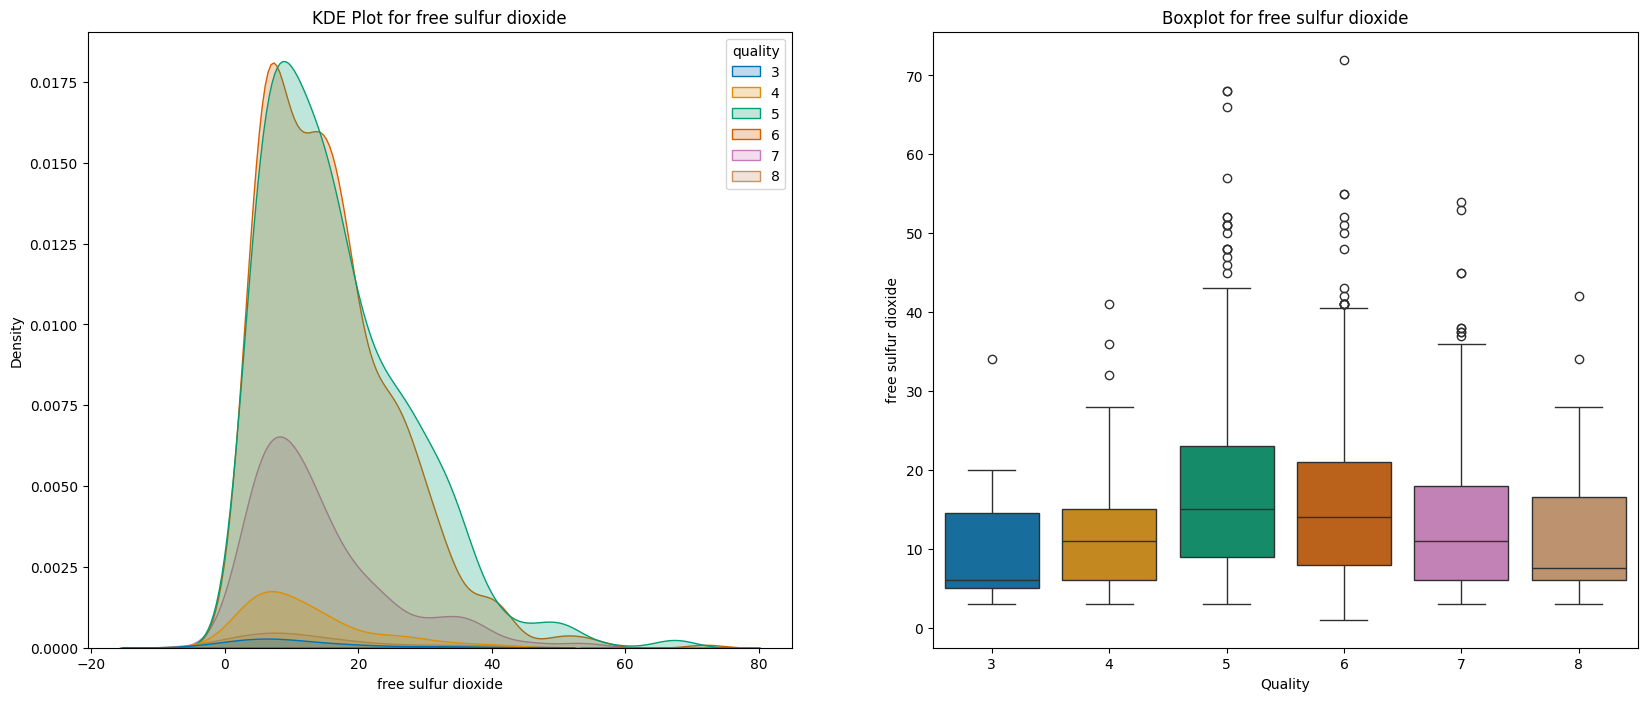

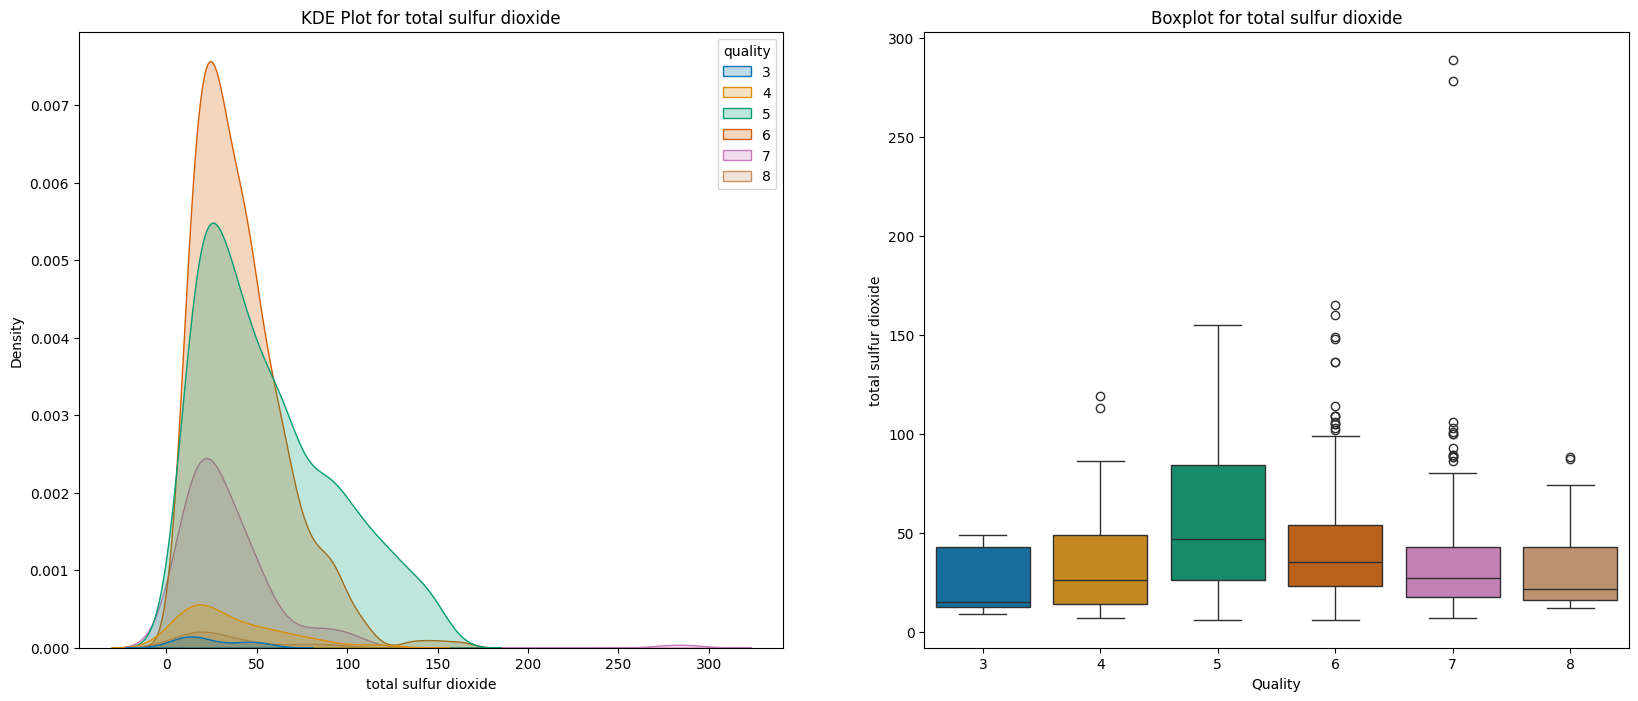

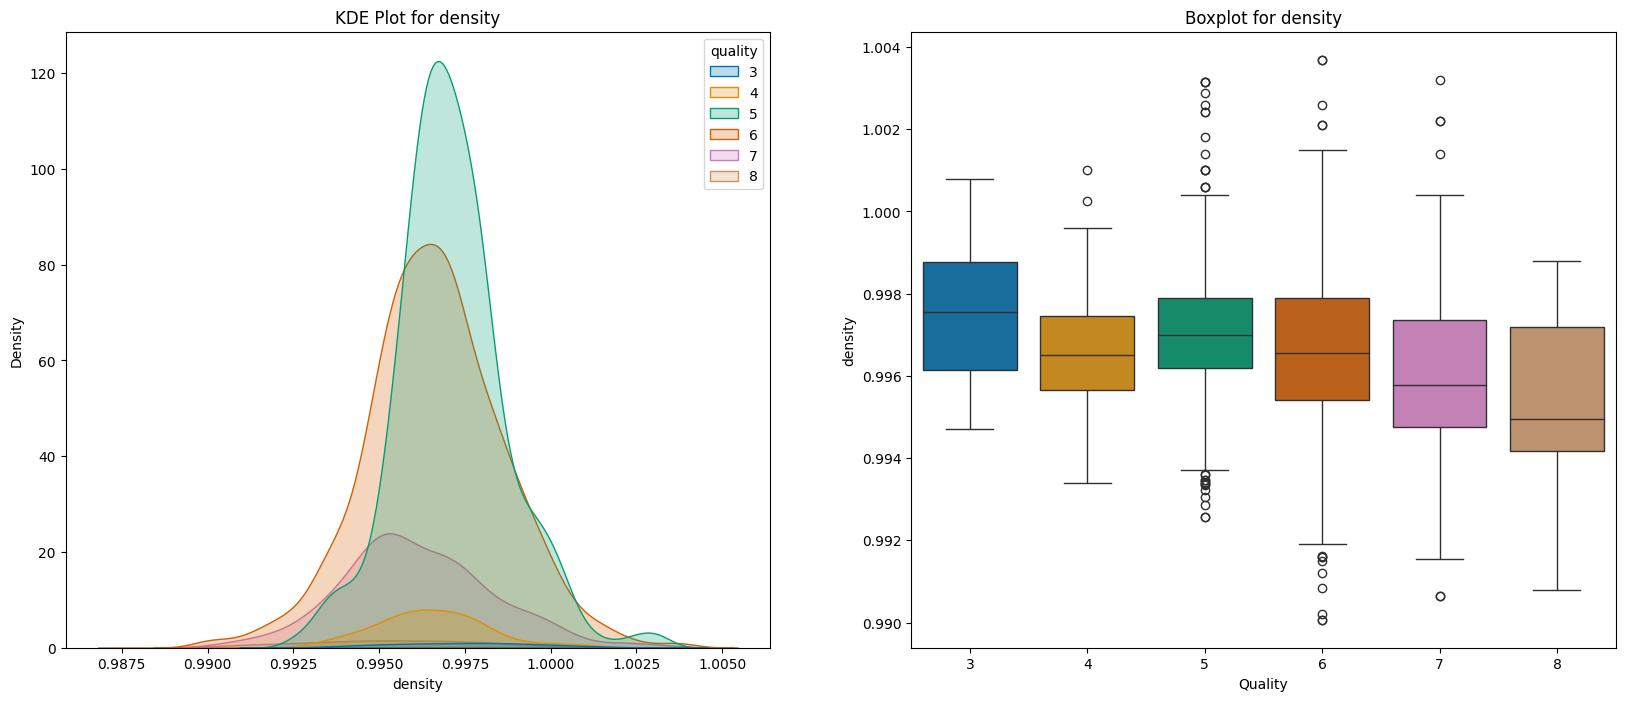

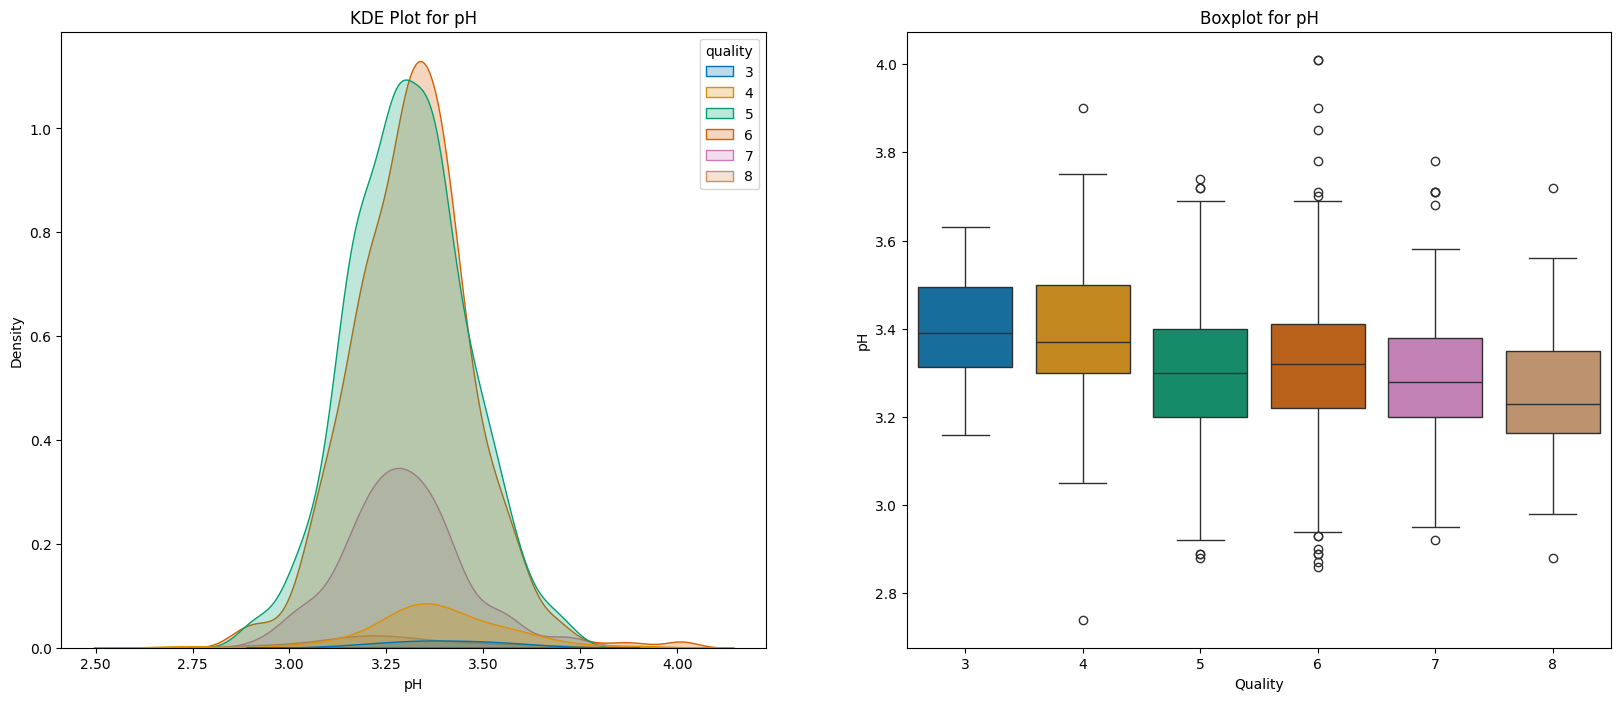

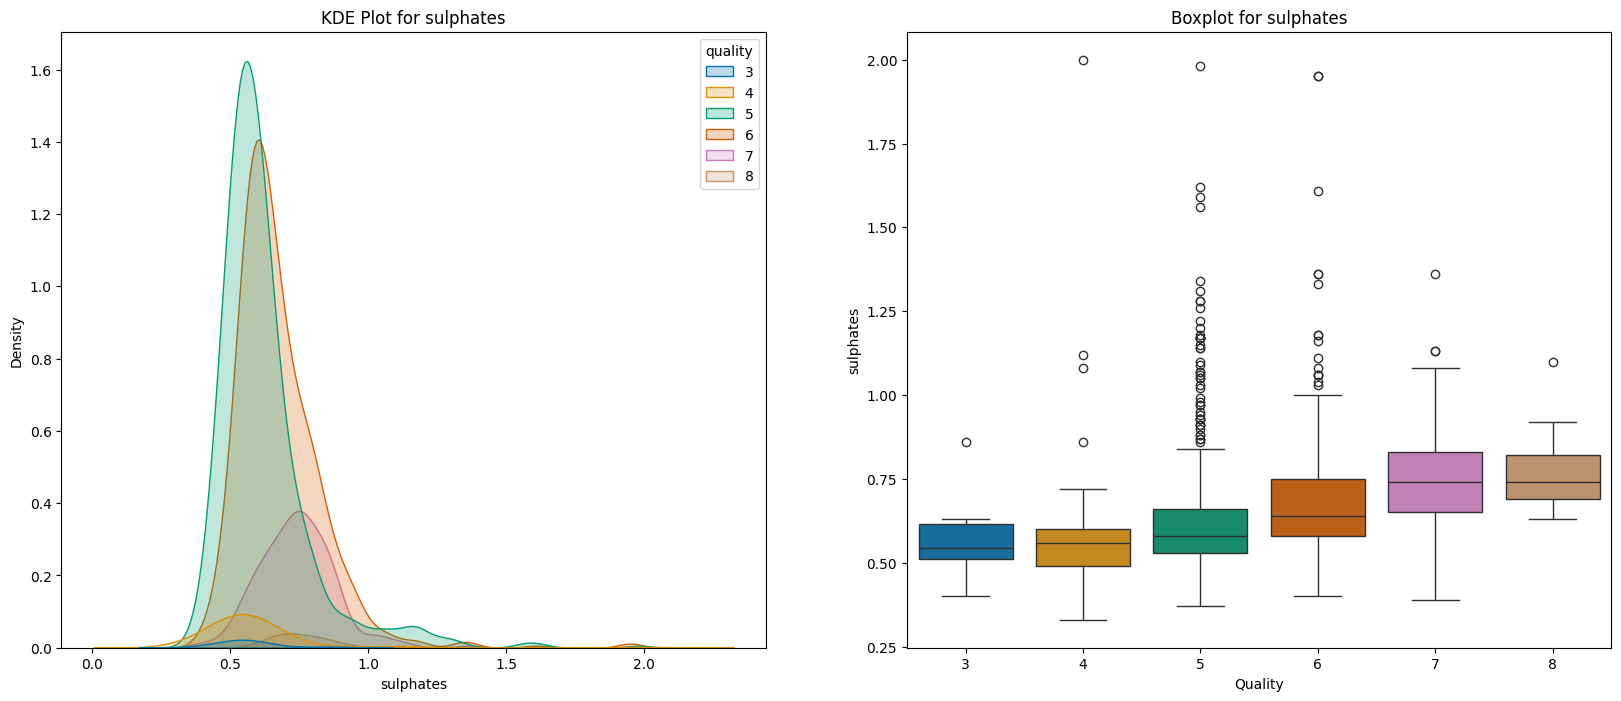

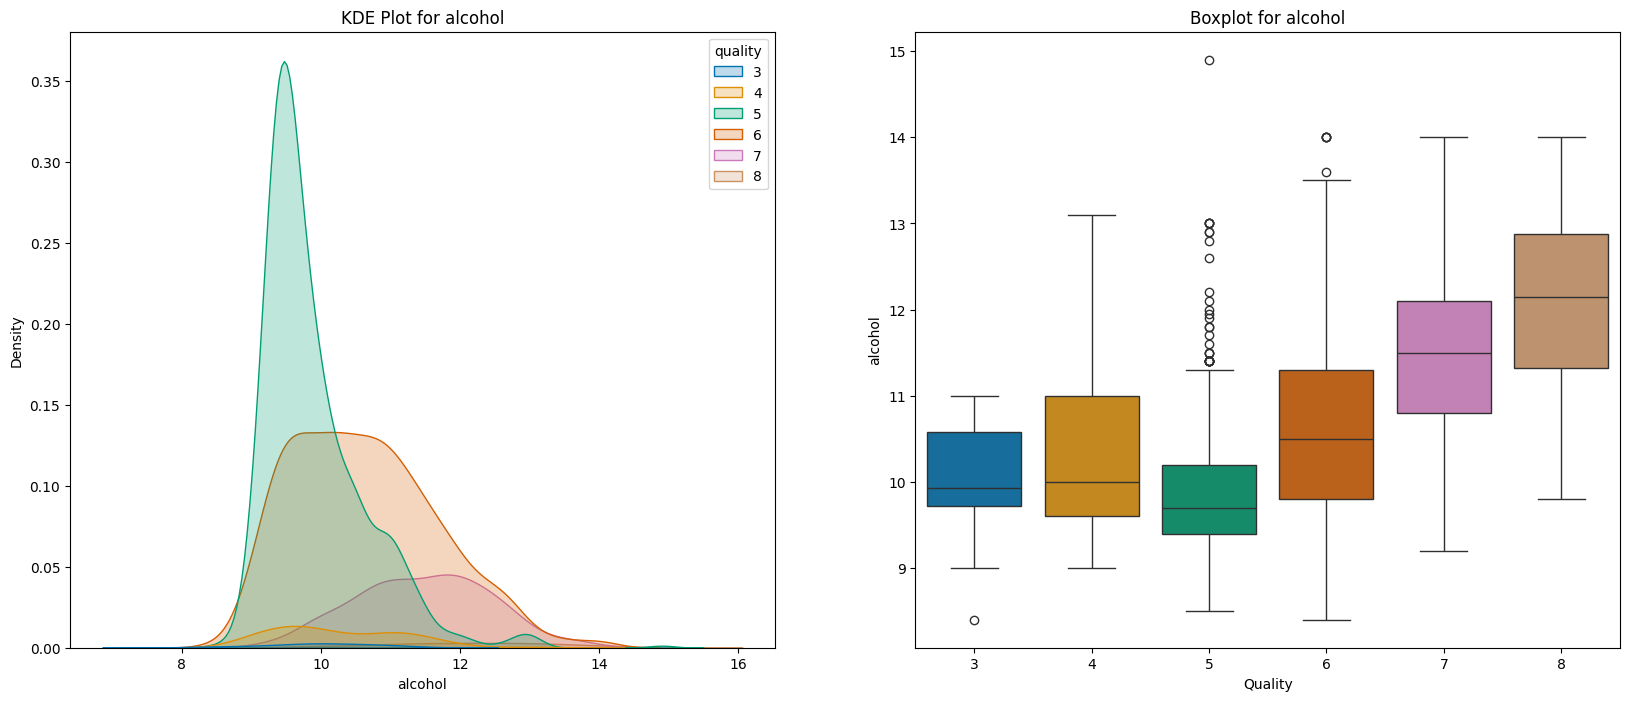

In [39]:
def plot_column(df, column_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # KDE Plot
    sns.kdeplot(data=df, x=column_name, hue="quality", shade=True, palette="colorblind", ax=ax1)
    ax1.set_title(f'KDE Plot for {column_name}')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Density')
    
    # Boxplot
    sns.boxplot(x="quality", y=column_name, data=df, palette="colorblind", ax=ax2)
    ax2.set_title(f'Boxplot for {column_name}')
    ax2.set_xlabel('Quality')
    ax2.set_ylabel(column_name)
    
    plt.show()

# Example usage:
for column in df.columns[:-1]:  # Exclude the 'quality' column
    if df[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        plot_column(df, column)